In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from tqdm import tqdm

In [39]:
def f2(x,y):
    return x**4 + y**4 - 2*(x-y)**2
    

In [40]:
Dx = lambda f,x,y,h=1e-5: (f(x+h,y) - f(x-h,y))/(2*h)
Dy = lambda f,x,y,h=1e-5: (f(x,y+h) - f(x,y-h))/(2*h)

In [41]:
x0, y0 = 0.5,0.1

In [42]:
Gradient = lambda f,x,y: np.array([Dx(f,x,y),Dy(f,x,y)])
Gradient(f2,x0,y0)

array([-1.1  ,  1.604])

In [43]:
def Minimizer(f, N, tol=1e-5, gamma = 0.001):
    r=np.zeros((N,2))
    r[0]=[0., 3.]
    
    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])
    r_def=[]

    dif=1.
    for i in tqdm(range(1,N)):
        r[i]=r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1])
        Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
        dif=np.linalg.norm(r[i]-r[i-1])
        if dif>tol:
            r_def.append(r[i])
        
        
    return r_def,r,Grad

In [44]:
N = 5000
rdef,r,Grad = Minimizer(f2,N)

100%|██████████| 4999/4999 [00:00<00:00, 25832.39it/s]


In [45]:
print(len(rdef))
print(rdef[-1])
#Se observa que toma 545 iteraciones para llegar al minimo de la función, con el criterio de parada seleccionado

545
[-1.41376001  1.41378709]


In [46]:
f2(r[-1][0],r[-1][1])

-7.999999999999999

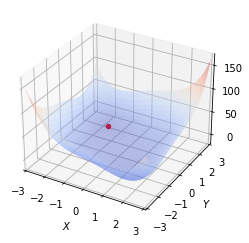

In [47]:
x=np.linspace(-2,2,200)
y=np.linspace(-2,2,200)
fig = plt.figure()


ax = fig.add_subplot(111,projection='3d')
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)

ax.set_xlim3d(x[0],x[-1])
ax.set_ylim3d(y[0],y[-1])
ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.plot_surface(X,Y,Z, cmap = 'coolwarm', alpha=0.4)
ax.scatter(r[-1][0],r[-1][1],c='r', marker='o')
# Mostramos el gráfico
plt.show()

In [48]:
def MinimizerMomentum(f, N,eta, tol=1e-5, gamma = 0.001):
    r=np.zeros((N,2))
    r[0]=[0., 3.]
    #r[0] = np.random.uniform(-5.,5.,size=2)
    
    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])
    r_def=[]

    dif=1.
    for i in tqdm(range(3,N)):

        r[i]=r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1]) + eta*(r[i-2]-r[i-3])
        Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
        dif=np.linalg.norm(r[i]-r[i-1])
        if dif>tol:
            r_def.append(r[i])
        
        
    return r_def,r,Grad

In [49]:
rdef2,r2,Grad2 = MinimizerMomentum(f2,N,0.6)

100%|██████████| 4997/4997 [00:00<00:00, 25414.35it/s]


In [50]:
print(len(rdef2))
print(rdef2[-1])
#Se observa que toma 219 iteraciones para llegar al minimo de la función, con el criterio de parada seleccionado
#No obstante, se llega al otro minimo de la función con eta=0.6

219
[ 1.41406532 -1.41406593]


In [51]:
rdef3,r3,Grad3 = MinimizerMomentum(f2,N,0.8)
print(len(rdef3))
print(rdef3[-1])
#Se observa que toma 288 iteraciones para llegar al minimo de la función, con el criterio de parada seleccionado
#Con eta=0.8 sí se llega al mismo minimo de la función que se llega con el método tradicional de descenso del gradiente

100%|██████████| 4997/4997 [00:00<00:00, 25427.52it/s]

288
[-1.41425578  1.41425103]


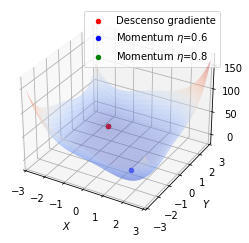

In [52]:
x=np.linspace(-2,2,200)
y=np.linspace(-2,2,200)
fig = plt.figure()


ax = fig.add_subplot(111,projection='3d')
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)

ax.set_xlim3d(x[0],x[-1])
ax.set_ylim3d(y[0],y[-1])
ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.plot_surface(X,Y,Z, cmap = 'coolwarm', alpha=0.4)
ax.scatter(r[-1][0],r[-1][1],c='r', marker='o', label='Descenso gradiente')
ax.scatter(r2[-1][0],r2[-1][1],c='b', marker='o', label='Momentum $\eta$=0.6')
ax.scatter(r3[-1][0],r3[-1][1],c='g', marker='o', label='Momentum $\eta$=0.8')
plt.legend(loc='best')
# Mostramos el gráfico
plt.show()